In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

In [49]:
mlc = pd.read_csv('../data/MLC_Matching_Sample_NSS.csv')

In [50]:
mlc.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


### Clean up dataset

In [51]:
# Rename columns
mlc.columns = ['ISRC', 'Country', 'Registrant', 'Release_Year', 'Period', 'DSP', 'Streams', 'Artist', 'Label', 'Song', 'Album', 'Duration', 'Songwriter']

In [52]:
mlc["Streams"] = mlc["Streams"].str.replace(",", "")
mlc["Streams"] = mlc["Streams"].str.replace(" ", "")
mlc[["Streams"]] = mlc[["Streams"]].apply(pd.to_numeric)

In [53]:
# Inspecting mlc_df after data cleaning
print(mlc.shape) # 100,000 rows and 13 columns
print(mlc.dtypes)

(100000, 13)
ISRC             object
Country          object
Registrant       object
Release_Year    float64
Period           object
DSP              object
Streams           int64
Artist           object
Label            object
Song             object
Album            object
Duration          int64
Songwriter        int64
dtype: object


In [54]:
#Exploring US only data
# domestic = mlc.loc[mlc['Country']== 'US']

In [55]:
# domestic.head()

In [56]:
# domestic['DSP'].value_counts()

In [57]:
# More initial exploration
# mlc.info

In [58]:
# mlc.sort_values('Streams')

In [59]:
# mlc.describe()

In [60]:
# mlc.isnull().sum()

In [61]:
# mlc.Artist.value_counts()

In [62]:
# mlc.loc[mlc['Streams'] ==mlc.Streams.max()]

## Exploring the dataset

In [64]:
DSP_counts = mlc['DSP'].value_counts()
print(DSP_counts)

Spotify               32268
Apple                 22200
Amazon                14438
Pandora               13777
Tidal                  3521
YouTube                2752
SoundCloud             2122
GTL                    1090
Melodyv                 829
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 316
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: DSP, dtype: int64


## 3 dataframes: rows_per_DSP, streams_per_DSP, songwriter_df 

### songwriter dataframe

In [65]:
# Songwriter ratio: Liklihood of each DSP to provide songwriter info
sw_ratio = mlc.groupby('DSP')['Songwriter'].mean()
sw_ratio = sw_ratio.sort_values(ascending=False)
print(sw_ratio)

DSP
Classical Archives    1.000000
Qoboz                 0.903846
Deezer                0.862745
Spotify               0.854376
Apple                 0.808514
Recisio               0.545455
Amazon                0.261740
Pandora               0.244828
Melodyv               0.114596
LiveXLive             0.070000
GTL                   0.028440
Tidal                 0.003692
Smithsonian           0.000000
Ultimate Guitar       0.000000
Trebel                0.000000
Wolfgangs             0.000000
SoundCloud            0.000000
Sonos                 0.000000
YouTube               0.000000
Pacemaker             0.000000
PowerMusic            0.000000
Anghami               0.000000
NugsNet               0.000000
MonkingMe             0.000000
MixCloud              0.000000
Midwest Tape          0.000000
Fan Label             0.000000
AudioMack             0.000000
iHeart Radio          0.000000
Name: Songwriter, dtype: float64


In [68]:
# Make sw_ratio into dataframe and rename the first column (DSP is index)
mlc["Songwriter"] = pd.to_numeric(mlc["Songwriter"]*100)
sw_ratio = mlc.groupby('DSP')['Songwriter'].mean()
sw_ratio = sw_ratio.sort_values(ascending=False)
print(sw_ratio)

DSP
Classical Archives    100.000000
Qoboz                  90.384615
Deezer                 86.274510
Spotify                85.437585
Apple                  80.851351
Recisio                54.545455
Amazon                 26.173985
Pandora                24.482834
Melodyv                11.459590
LiveXLive               7.000000
GTL                     2.844037
Tidal                   0.369213
Smithsonian             0.000000
Ultimate Guitar         0.000000
Trebel                  0.000000
Wolfgangs               0.000000
SoundCloud              0.000000
Sonos                   0.000000
YouTube                 0.000000
Pacemaker               0.000000
PowerMusic              0.000000
Anghami                 0.000000
NugsNet                 0.000000
MonkingMe               0.000000
MixCloud                0.000000
Midwest Tape            0.000000
Fan Label               0.000000
AudioMack               0.000000
iHeart Radio            0.000000
Name: Songwriter, dtype: float64


In [69]:
# mlc['ISRC'].isnull().sum()

In [70]:
# mlc.loc[mlc['DSP'] == 'Amazon']

In [71]:
# mlc.loc[(mlc['DSP'] == 'Amazon') & (mlc['Registrant'] == isnull()]

## streams_per_DSP dataframe

In [72]:
# Number/sum of streams per DSP
streams_per_DSP = mlc.groupby('DSP')['Streams'].sum()
streams_per_DSP = streams_per_DSP.sort_values(ascending=False)
print(streams_per_DSP)

DSP
Spotify               2552563722
Apple                 1606453701
Pandora                874236566
SoundCloud             166813813
YouTube                158031119
Amazon                 151199800
Tidal                   48793126
AudioMack               11991559
Melodyv                  5384657
iHeart Radio             2141959
GTL                      1280764
Trebel                    149347
NugsNet                   110709
LiveXLive                 101307
Deezer                     87830
Midwest Tape               85708
Anghami                    34682
Sonos                      31402
Qoboz                       6621
MonkingMe                   3549
PowerMusic                  3154
MixCloud                    2661
Pacemaker                   1707
Wolfgangs                    965
Ultimate Guitar              309
Smithsonian                  208
Fan Label                     91
Recisio                       29
Classical Archives            20
Name: Streams, dtype: int64


In [73]:
streams_df = pd.DataFrame(streams_per_DSP)
streams_df.reset_index(inplace=True)
streams_df.columns = ['DSP', 'Streams_Per_DSP']
print(streams_df)

                   DSP  Streams_Per_DSP
0              Spotify       2552563722
1                Apple       1606453701
2              Pandora        874236566
3           SoundCloud        166813813
4              YouTube        158031119
5               Amazon        151199800
6                Tidal         48793126
7            AudioMack         11991559
8              Melodyv          5384657
9         iHeart Radio          2141959
10                 GTL          1280764
11              Trebel           149347
12             NugsNet           110709
13           LiveXLive           101307
14              Deezer            87830
15        Midwest Tape            85708
16             Anghami            34682
17               Sonos            31402
18               Qoboz             6621
19           MonkingMe             3549
20          PowerMusic             3154
21            MixCloud             2661
22           Pacemaker             1707
23           Wolfgangs              965


## rows_per_DSP dataframe

In [74]:
# Number of recordings (rows) per DSP
rows_per_DSP = mlc['DSP'].value_counts()
print(rows_per_DSP)

Spotify               32268
Apple                 22200
Amazon                14438
Pandora               13777
Tidal                  3521
YouTube                2752
SoundCloud             2122
GTL                    1090
Melodyv                 829
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 316
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: DSP, dtype: int64


In [75]:
rows_df = pd.DataFrame(rows_per_DSP)
rows_df.reset_index(inplace=True)
rows_df.columns = ['DSP', 'Songs_Per_DSP']
print(rows_df)

                   DSP  Songs_Per_DSP
0              Spotify          32268
1                Apple          22200
2               Amazon          14438
3              Pandora          13777
4                Tidal           3521
5              YouTube           2752
6           SoundCloud           2122
7                  GTL           1090
8              Melodyv            829
9               Trebel            817
10        iHeart Radio            707
11           AudioMack            550
12             NugsNet            316
13           LiveXLive            200
14               Qoboz            104
15        Midwest Tape            102
16              Deezer             51
17             Anghami             46
18               Sonos             23
19             Recisio             22
20         Smithsonian             21
21     Ultimate Guitar             19
22          PowerMusic              8
23           Wolfgangs              4
24           Fan Label              4
25          

## Merge the three dataframes together on DSP

In [76]:
# Merge the three dataframes together on DSP
DSP_df1 = pd.merge(sw_ratio, streams_df, on=['DSP'], how='inner')
print(DSP_df1)

                   DSP  Songwriter  Streams_Per_DSP
0   Classical Archives  100.000000               20
1                Qoboz   90.384615             6621
2               Deezer   86.274510            87830
3              Spotify   85.437585       2552563722
4                Apple   80.851351       1606453701
5              Recisio   54.545455               29
6               Amazon   26.173985        151199800
7              Pandora   24.482834        874236566
8              Melodyv   11.459590          5384657
9            LiveXLive    7.000000           101307
10                 GTL    2.844037          1280764
11               Tidal    0.369213         48793126
12         Smithsonian    0.000000              208
13     Ultimate Guitar    0.000000              309
14              Trebel    0.000000           149347
15           Wolfgangs    0.000000              965
16          SoundCloud    0.000000        166813813
17               Sonos    0.000000            31402
18          

In [77]:
DSP_df2 = pd.merge(DSP_df1, rows_df, on=['DSP'], how='inner')
print(DSP_df2)

                   DSP  Songwriter  Streams_Per_DSP  Songs_Per_DSP
0   Classical Archives  100.000000               20              2
1                Qoboz   90.384615             6621            104
2               Deezer   86.274510            87830             51
3              Spotify   85.437585       2552563722          32268
4                Apple   80.851351       1606453701          22200
5              Recisio   54.545455               29             22
6               Amazon   26.173985        151199800          14438
7              Pandora   24.482834        874236566          13777
8              Melodyv   11.459590          5384657            829
9            LiveXLive    7.000000           101307            200
10                 GTL    2.844037          1280764           1090
11               Tidal    0.369213         48793126           3521
12         Smithsonian    0.000000              208             21
13     Ultimate Guitar    0.000000              309           

In [78]:
# pd.reset_option('display.float_format')
# print(DSP_df2)

## master dataframe below

In [79]:
# Reorder by Streams_Per_DSP in descending order = FINAL MERGED DATAFRAM
DSP_df2 = DSP_df2.sort_values(by=['Streams_Per_DSP'], ascending=False)
print(DSP_df2)

                   DSP  Songwriter  Streams_Per_DSP  Songs_Per_DSP
3              Spotify   85.437585       2552563722          32268
4                Apple   80.851351       1606453701          22200
7              Pandora   24.482834        874236566          13777
16          SoundCloud    0.000000        166813813           2122
18             YouTube    0.000000        158031119           2752
6               Amazon   26.173985        151199800          14438
11               Tidal    0.369213         48793126           3521
27           AudioMack    0.000000         11991559            550
8              Melodyv   11.459590          5384657            829
28        iHeart Radio    0.000000          2141959            707
10                 GTL    2.844037          1280764           1090
14              Trebel    0.000000           149347            817
22             NugsNet    0.000000           110709            316
9            LiveXLive    7.000000           101307           

## Plots and graphs

In [80]:
# Top 7 DSPs by Streams_Per_DSP
# plt.bar(DSP_df2.DSP.isin(['Spotify', 'Apple', 'Pandora', 'SoundCloud', 'YouTube', 'Amazon', 'Tidal']), DSP_df2.SW_Avg);

In [81]:
# Plot top 7 by Streams
top_7 = DSP_df2.head(7)
print(top_7)

           DSP  Songwriter  Streams_Per_DSP  Songs_Per_DSP
3      Spotify   85.437585       2552563722          32268
4        Apple   80.851351       1606453701          22200
7      Pandora   24.482834        874236566          13777
16  SoundCloud    0.000000        166813813           2122
18     YouTube    0.000000        158031119           2752
6       Amazon   26.173985        151199800          14438
11       Tidal    0.369213         48793126           3521


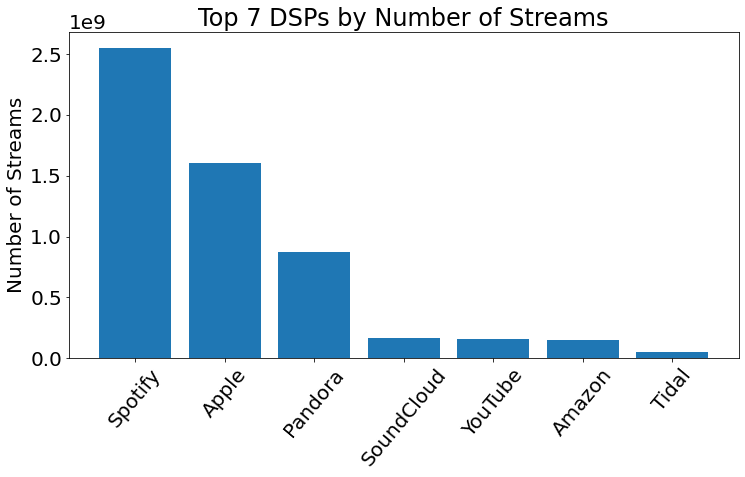

In [82]:
plt.figure(figsize=(12, 6))
plt.bar(top_7.DSP, top_7.Streams_Per_DSP)
plt.ylabel('Number of Streams') # Number of Streams times 10^9
plt.xticks(rotation = 50)
plt.title('Top 7 DSPs by Number of Streams');

In [83]:
SW_avg_df = DSP_df2.sort_values(by=['Songwriter'], ascending=False)
print(SW_avg_df)

                   DSP  Songwriter  Streams_Per_DSP  Songs_Per_DSP
0   Classical Archives  100.000000               20              2
1                Qoboz   90.384615             6621            104
2               Deezer   86.274510            87830             51
3              Spotify   85.437585       2552563722          32268
4                Apple   80.851351       1606453701          22200
5              Recisio   54.545455               29             22
6               Amazon   26.173985        151199800          14438
7              Pandora   24.482834        874236566          13777
8              Melodyv   11.459590          5384657            829
9            LiveXLive    7.000000           101307            200
10                 GTL    2.844037          1280764           1090
11               Tidal    0.369213         48793126           3521
20          PowerMusic    0.000000             3154              8
26           Fan Label    0.000000               91           

In [84]:
# Subset the top 7 DSPs by streams to include only those top 7 we want by SW_Avg desc
top_7_sw = SW_avg_df.loc[SW_avg_df['DSP'].isin(['Spotify','Apple', 'Pandora', 'SoundCloud', 'YouTube', 'Amazon', 'Tidal'])]
print(top_7_sw)

           DSP  Songwriter  Streams_Per_DSP  Songs_Per_DSP
3      Spotify   85.437585       2552563722          32268
4        Apple   80.851351       1606453701          22200
6       Amazon   26.173985        151199800          14438
7      Pandora   24.482834        874236566          13777
11       Tidal    0.369213         48793126           3521
16  SoundCloud    0.000000        166813813           2122
18     YouTube    0.000000        158031119           2752


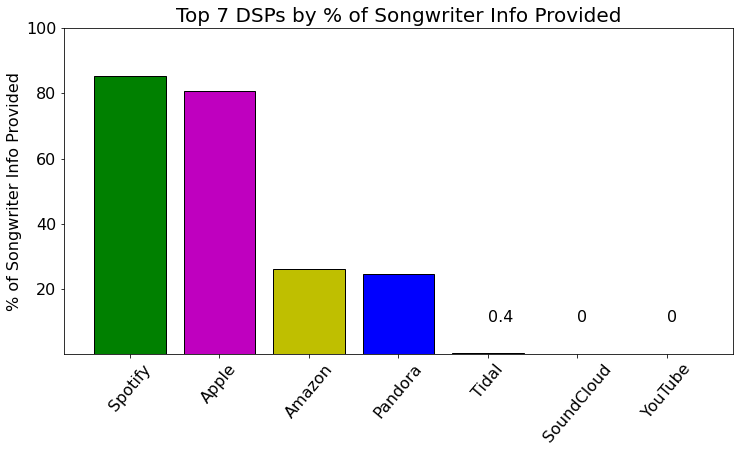

In [86]:
# Plot top 7 by SW_Avg
plt.figure(figsize=(12, 6))
plt.bar(top_7_sw.DSP, top_7_sw.Songwriter, color=['g', 'm', 'y', 'b', '1', 'orange', 'r'], edgecolor='black')
plt.ylabel('% of Songwriter Info Provided', fontsize=16)
plt.xticks(rotation = 50, fontsize=16)
plt.yticks([20, 40, 60, 80, 100], fontsize=16)
plt.text('YouTube', 10, '0', fontsize=16)
plt.text('SoundCloud', 10, '0', fontsize=16)
plt.text('Tidal', 10, '0.4', fontsize=16)
plt.title('Top 7 DSPs by % of Songwriter Info Provided', fontsize=20);

In [87]:
# Subset the DSPs by Songs_Per_DSP
Songs_Per_DSP_df = DSP_df2.sort_values(by=['Songs_Per_DSP'], ascending=False)
print(Songs_Per_DSP_df)

                   DSP  Songwriter  Streams_Per_DSP  Songs_Per_DSP
3              Spotify   85.437585       2552563722          32268
4                Apple   80.851351       1606453701          22200
6               Amazon   26.173985        151199800          14438
7              Pandora   24.482834        874236566          13777
11               Tidal    0.369213         48793126           3521
18             YouTube    0.000000        158031119           2752
16          SoundCloud    0.000000        166813813           2122
10                 GTL    2.844037          1280764           1090
8              Melodyv   11.459590          5384657            829
14              Trebel    0.000000           149347            817
28        iHeart Radio    0.000000          2141959            707
27           AudioMack    0.000000         11991559            550
22             NugsNet    0.000000           110709            316
9            LiveXLive    7.000000           101307           

In [88]:
top_7_sdp = Songs_Per_DSP_df.loc[Songs_Per_DSP_df['DSP'].isin(['Spotify','Apple', 'Pandora', 'SoundCloud', 'YouTube', 'Amazon', 'Tidal'])]
print(top_7_sdp)

           DSP  Songwriter  Streams_Per_DSP  Songs_Per_DSP
3      Spotify   85.437585       2552563722          32268
4        Apple   80.851351       1606453701          22200
6       Amazon   26.173985        151199800          14438
7      Pandora   24.482834        874236566          13777
11       Tidal    0.369213         48793126           3521
18     YouTube    0.000000        158031119           2752
16  SoundCloud    0.000000        166813813           2122


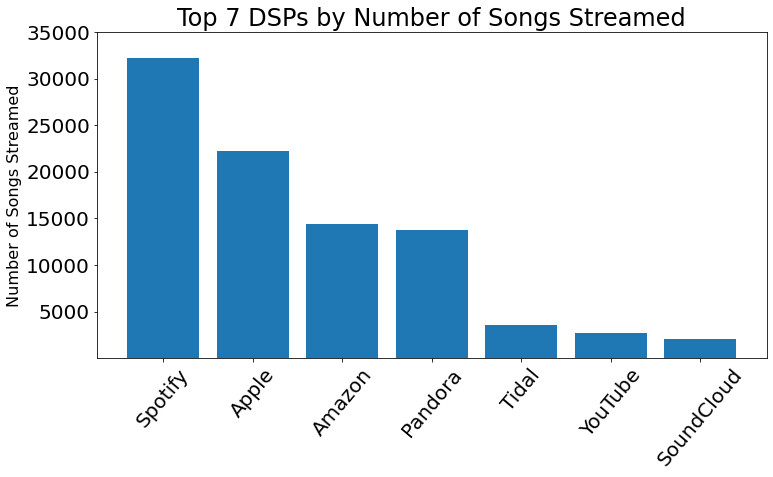

In [89]:
# Plot top 7 by Songs_Per_DSP
plt.figure(figsize=(12, 6))
plt.bar(top_7_sdp.DSP, top_7_sdp.Songs_Per_DSP)
plt.rcParams.update({'font.size':20}) # Made everything bigger except ylabel
plt.ylabel('Number of Songs Streamed', fontsize=16)
plt.xticks(rotation = 50)
plt.yticks([5000, 10000, 15000, 20000, 25000, 30000, 35000])
plt.title('Top 7 DSPs by Number of Songs Streamed');